In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
trial = np.random.randint(1,7, size=1000)

(array([157., 147., 170., 169., 174., 183.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

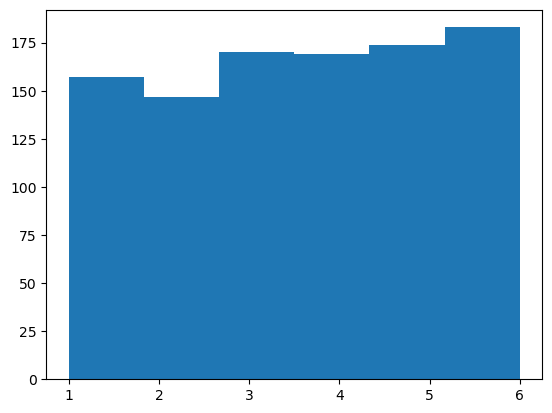

In [21]:
plt.hist(trial,bins=6)

In [2]:
df = pd.read_csv('Database/DatosEstratificados.csv')

In [3]:
df

,Salon,Asistentes
0,Salon_A,40
1,Salon_B,100
2,Salon_C,95
3,Salon_D,70
4,Salon_E,510
5,Salon_F,200
6,Salon_G,150
7,Salon_H,125
8,Salon_I,310
9,Salon_J,400


In [4]:
#Calculamos el Total de los datos

In [5]:
N = np.sum(df.Asistentes)
N

2000

In [6]:
#Tomar la proporcion (n/N) y el porcentaje (Proporcion * 100) para cada categoria o estrato
df = df.assign(Proporcion = df.Asistentes/N) # probabilidad de pertenencia - PROPORCION sale de la frecuencia ABSOLUTA
df = df.assign(Porcentaje= df.Proporcion*100)

In [7]:
df

,Salon,Asistentes,Proporcion,Porcentaje
0,Salon_A,40,0.0200,2.00
1,Salon_B,100,0.0500,5.00
2,Salon_C,95,0.0475,4.75
3,Salon_D,70,0.0350,3.50
4,Salon_E,510,0.2550,25.50
5,Salon_F,200,0.1000,10.00
6,Salon_G,150,0.0750,7.50
7,Salon_H,125,0.0625,6.25
8,Salon_I,310,0.1550,15.50
9,Salon_J,400,0.2000,20.00


In [8]:
# Resolviendo la solicitud 
#Tamaño de la muestra 200 , determinar cuantas personas de cada estrato o categoria deberan encuestarse

In [9]:
n = 200
df = df.assign( PersonasEncuestadas = n*df.Proporcion)
df

,Salon,Asistentes,Proporcion,Porcentaje,PersonasEncuestadas
0,Salon_A,40,0.0200,2.00,4.0
1,Salon_B,100,0.0500,5.00,10.0
2,Salon_C,95,0.0475,4.75,9.5
3,Salon_D,70,0.0350,3.50,7.0
4,Salon_E,510,0.2550,25.50,51.0
5,Salon_F,200,0.1000,10.00,20.0
6,Salon_G,150,0.0750,7.50,15.0
7,Salon_H,125,0.0625,6.25,12.5
8,Salon_I,310,0.1550,15.50,31.0
9,Salon_J,400,0.2000,20.00,40.0


In [10]:
#Confirmar que el total de las personas encuestadas por cateogoria debe corresponder con el total (n)

In [11]:
np.sum(df.PersonasEncuestadas)

200.0

In [12]:
df = pd.read_excel('Database/Empresa_A.xlsx',sheet_name='Hola')

In [14]:
df.describe() #Permite ver los regisotr y demas caracteristicas genrales (Estadisticas) del archivo cargado

,Empleados
count,2000
unique,5
top,Administrativos
freq,800


In [15]:
counts = pd.value_counts(df.Empleados) # contar las categorias encontradas en el archivo
counts

Administrativos    800
Finanzas           400
Contabilidad       300
Mercadeo           300
Personal-Aseo      200
Name: Empleados, dtype: int64

In [16]:
Dict = { 'Estratos':counts }
df2 = pd.DataFrame(Dict)
df2

,Estratos
Administrativos,800
Finanzas,400
Contabilidad,300
Mercadeo,300
Personal-Aseo,200


In [17]:
N = np.sum( df2.Estratos )
N

2000

In [18]:
df2 = df2.assign( Proporcion = df2.Estratos/N )
df2 = df2.assign( Porcentaje = df2.Proporcion*100 )
df2

,Estratos,Proporcion,Porcentaje
Administrativos,800,0.40,40.0
Finanzas,400,0.20,20.0
Contabilidad,300,0.15,15.0
Mercadeo,300,0.15,15.0
Personal-Aseo,200,0.10,10.0


In [19]:
n = 1000
df2 = df2.assign( PersonasEncuestadas = n*df2.Proporcion )
df2

,Estratos,Proporcion,Porcentaje,PersonasEncuestadas
Administrativos,800,0.40,40.0,400.0
Finanzas,400,0.20,20.0,200.0
Contabilidad,300,0.15,15.0,150.0
Mercadeo,300,0.15,15.0,150.0
Personal-Aseo,200,0.10,10.0,100.0


In [32]:
df2.to_excel('MuestreoEmpresaA.xlsx')